In [ ]:
# mount drive to access data
from google.colab import drive
drive.mount('/content/gdrive')

# Evaluate

In [77]:
# spearman correlation on test

from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from typing import Dict

def test_results(file_path: str, model_name: str) -> Dict[str, float]:
  df = pd.read_csv(file_path)
  preds = df.predictions.tolist()
  gold = df.gold_labels.tolist()

  # spearman's rank
  rho, pval = stats.spearmanr(preds, gold)

  # mae and mse
  samesies = []
  same_preds = []
  fieldies = []
  field_preds = []
  diffies = []
  diff_preds = []
  for label, pred in zip(gold, preds):
    if round(label, 2) == 0.95:
      samesies.append(label)
      same_preds.append(pred)
    elif label == 0.5:
      fieldies.append(label)
      field_preds.append(pred)
    else:
      diffies.append(label)
      diff_preds.append(pred)

  # mean absolute error
  mae = mean_absolute_error(preds, gold)
  # mean squared error
  mse = mean_squared_error(preds, gold)
  mae_same = mean_absolute_error(same_preds, samesies)
  mse_same = mean_squared_error(same_preds, samesies)
  mae_field = mean_absolute_error(not_same_preds, not_samesies)
  mse_field = mean_squared_error(not_same_preds, not_samesies)
  mae_diff = mean_absolute_error(diff_preds, diffies)
  mse_diff = mean_squared_error(diff_preds, diffies)

  results = {
      'model_name': model_name,
      'spearman': round(rho, 4),
      'p-value': pval,
      'overall_mae': round(mae, 2),
      'overall_mse': round(mse, 2),
      '0.95_mae': round(mae_same, 2),
      '0.95_mse': round(mse_same, 2),
      '0.5_mae': round(mae_field, 2),
      '0.5_mse': round(mse_field, 2),
      '0.05_mae': round(mae_diff, 2),
      '0.05_mse': round(mse_diff, 2),
  }
  return results


In [78]:
import os
import pandas as pd

PREDS_PATH = "/content/gdrive/MyDrive/CUNY_Comp_Ling/advanced_nlp/term_project/_READY_FOR_PAPER/models_predictions/"
RESULTS_SAVE_PATH = "/content/gdrive/MyDrive/CUNY_Comp_Ling/advanced_nlp/term_project/_READY_FOR_PAPER/test_results.csv"

pred_files = [file for file in os.listdir(PREDS_PATH)]

columns = [
      'model_name',
      'spearman',
      'p-value',
      'overall_mae',
      'overall_mse',
      '0.95_mae',
      '0.95_mse',
      '0.5_mae',
      '0.5_mse',
      '0.05_mae',
      '0.05_mse',
]

models_results = pd.DataFrame(columns=columns)

for file in pred_files:
  filepath = PREDS_PATH + file
  model_name = file[:-16] # remove "_predictions.csv"
  results = test_results(filepath, model_name)
  models_results = models_results.append(results, ignore_index=True)

models_results.to_csv(RESULTS_SAVE_PATH)

# Plot

In [79]:

import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt

def graph(file_path: str, model_name: str):
  df = pd.read_csv(file_path)
  preds = df.predictions.tolist()
  gold = df.gold_labels.tolist()

  samesies = []
  same_preds = []
  fieldies = []
  field_preds = []
  diffies = []
  diff_preds = []
  for label, pred in zip(gold, preds):
    if round(label, 2) == 0.95:
      samesies.append(label)
      same_preds.append(pred)
    elif label == 0.5:
      fieldies.append(label)
      field_preds.append(pred)
    else:
      diffies.append(label)
      diff_preds.append(pred)

  #plt.xlabel('Gold Labels', fontsize=15)
  #plt.ylabel('Predictions', fontsize=15)
  #plt.scatter(gold, preds, c='turquoise')

  sb.scatterplot(x=np.array(preds), y=gold, color='purple')
  plt.xlabel('Predictions')
  plt.ylabel('Gold labels')
  plt.title(model_name)
  plt.show()

  

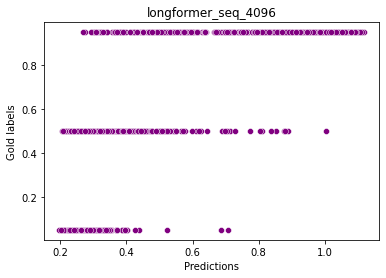

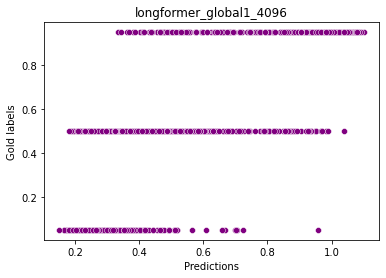

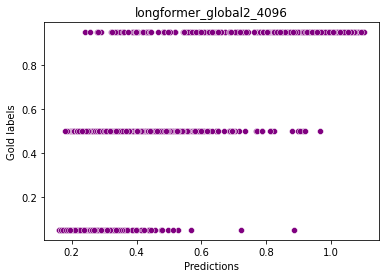

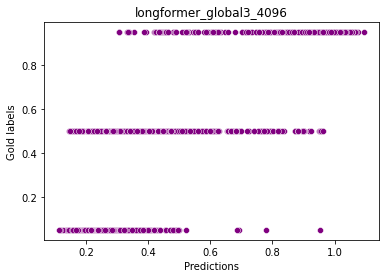

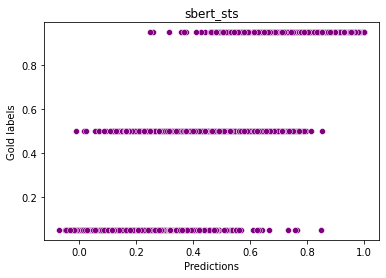

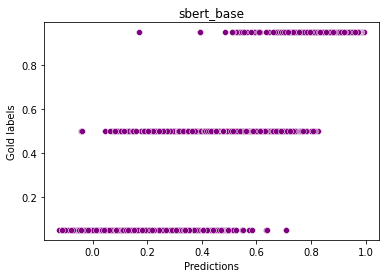

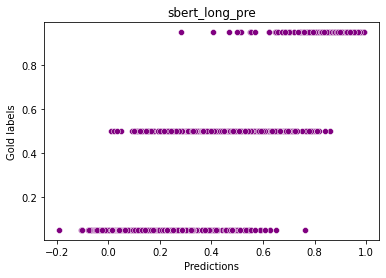

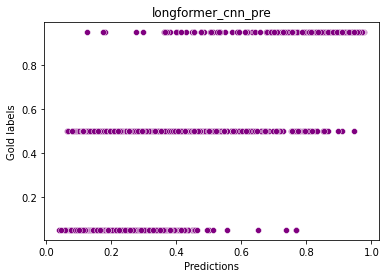

In [80]:
for file in pred_files:
  filepath = PREDS_PATH + file
  model_name = file[:-16] # remove "_predictions.csv"
  graph(filepath, model_name)
